In [ ]:
!pip install fastai

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.CIFAR)

In [4]:
data = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                    get_items=get_image_files,
                    get_y=parent_label,
                    item_tfms=Resize(40))

In [5]:
dataloader = data.dataloaders(path, bs=64, valid_pct=0.2, seed=42,)

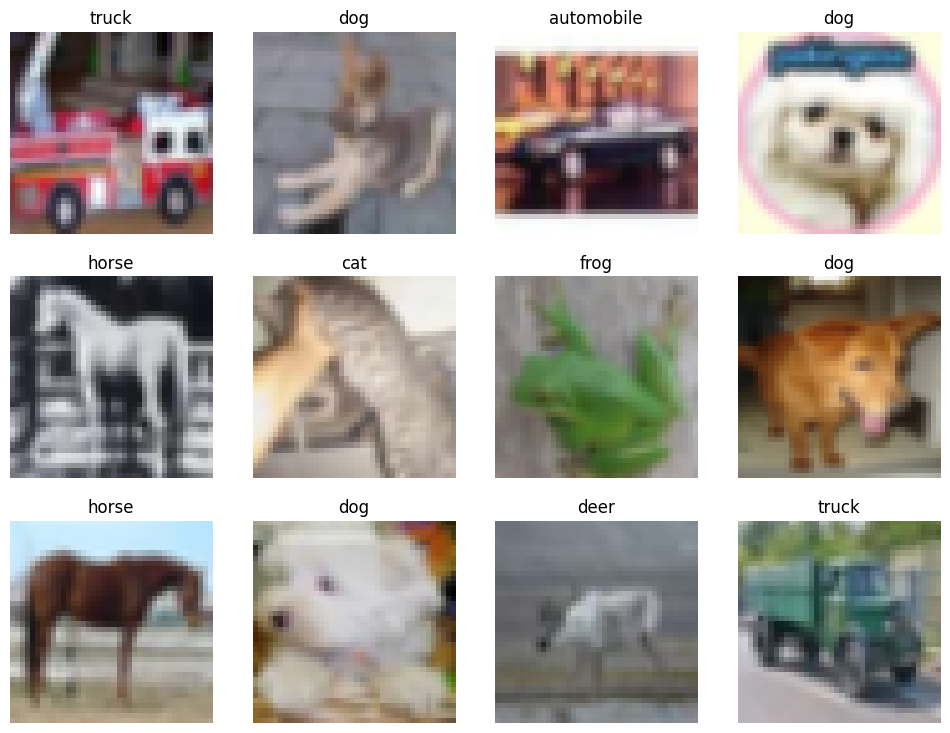

In [6]:
dataloader.valid.show_batch(max_n=12, nrows=3)

In [7]:
learner34 = vision_learner(dataloader, resnet34, metrics=accuracy)
learner34.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 71.7MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.406576,1.182714,0.585083,18:25


epoch,train_loss,valid_loss,accuracy,time
0,0.751568,0.634223,0.781333,28:09
1,0.578851,0.537214,0.816083,28:20
2,0.456947,0.497603,0.833500,29:12
3,0.336738,0.483010,0.844250,28:36
4,0.207417,0.512145,0.848917,28:57
5,0.118600,0.568659,0.854667,29:02
6,0.060828,0.617221,0.857250,28:26
7,0.024544,0.678964,0.859417,27:28


epoch,train_loss,valid_loss,accuracy,time
0,0.751568,0.634223,0.781333,28:09
1,0.578851,0.537214,0.816083,28:20
2,0.456947,0.497603,0.833500,29:12
3,0.336738,0.483010,0.844250,28:36
4,0.207417,0.512145,0.848917,28:57
5,0.118600,0.568659,0.854667,29:02
6,0.060828,0.617221,0.857250,28:26
7,0.024544,0.678964,0.859417,27:28
8,0.012252,0.693337,0.863083,27:15
9,0.006851,0.699739,0.863667,26:46


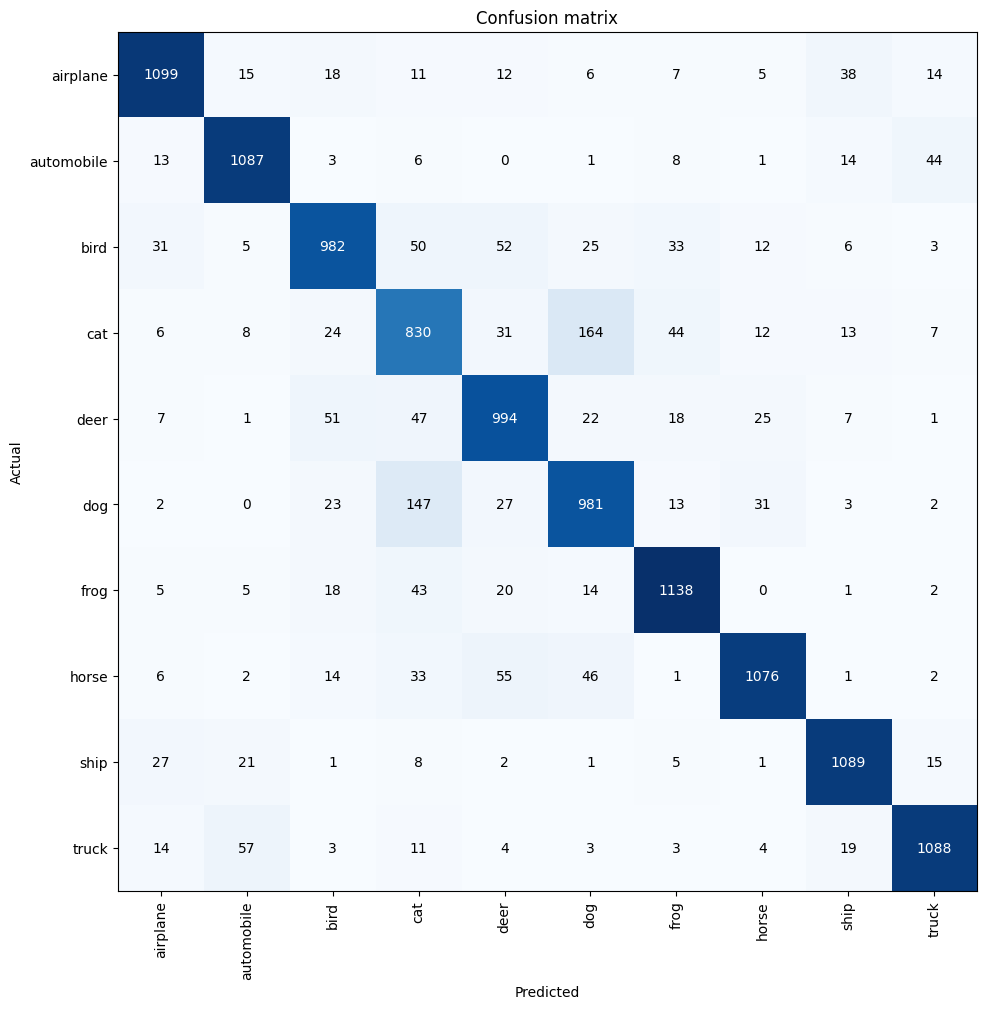

In [8]:
interp34 = ClassificationInterpretation.from_learner(learner34)
interp34.plot_confusion_matrix(figsize=(13,10))

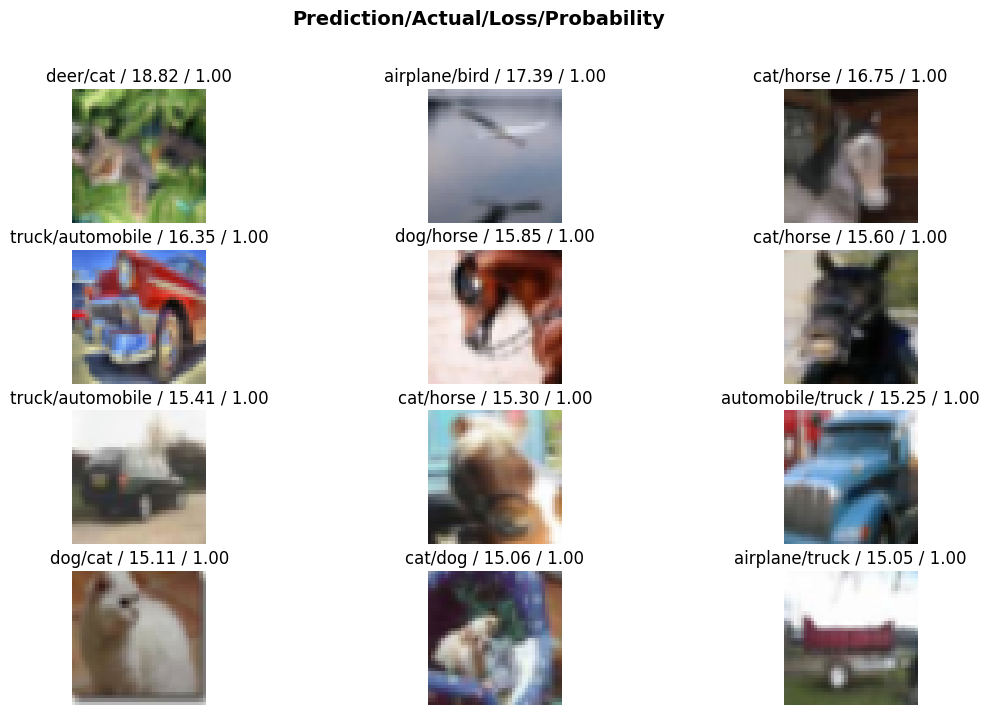

In [9]:
interp34.plot_top_losses(12, nrows=4, figsize=(13, 8))